## GPU 드라이버 확인

In [ ]:
!nvidia-smi

## TensorFlow

In [2]:
import tensorflow as tf

print(f'tf.__version__: {tf.__version__}')

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)

2023-01-14 18:46:29.005953: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 18:46:29.610436: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64:/opt/conda/lib
2023-01-14 18:46:29.610508: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib64:/usr/local/cuda/lib64:/opt/conda/lib
2023-01-

tf.__version__: 2.11.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')


## PyTorch

In [3]:
import torch

print(f'torch.__version__: {torch.__version__}')

print(f'GPU 사용여부: {torch.cuda.is_available()}')
gpu_count = torch.cuda.device_count()
print(f'GPU count: {gpu_count}')
if gpu_count > 0:
    print(f'GPU name: {torch.cuda.get_device_name(0)}')

torch.__version__: 1.10.1+cu111
GPU 사용여부: True
GPU count: 2
GPU name: NVIDIA GeForce RTX 3090


## 한글 자연어 처리 패키지

In [4]:
from konlpy.tag import Okt, Kkma, Hannanum

sample_sentence = '아버지가방에들어가신다.'

okt = Okt()
print(f'okt: {okt.pos(sample_sentence)}')

kkma = Kkma()
print(f'kkma: {okt.pos(sample_sentence)}')

hannanum = Hannanum()
print(f'hannanum: {hannanum.pos(sample_sentence)}')

okt: [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
kkma: [('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]
hannanum: [('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E'), ('.', 'S')]


## Mecab 추가 설치 확인

In [5]:
from konlpy.tag import Mecab

sample_sentence = '아버지가방에들어가신다.'

mecab = Mecab()
print(f'mecab: {mecab.pos(sample_sentence)}')

mecab: [('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EF'), ('.', 'SF')]


## 머신러닝 패키지 확인

In [6]:
import sklearn
import lightgbm
import xgboost

print(f'lightgbm: {lightgbm.__version__}\nxgboost: {xgboost.__version__}\nsklearn: {sklearn.__version__}')

lightgbm: 3.3.4
xgboost: 2.0.0-dev
sklearn: 1.2.0


## 한글 폰트 시각화 확인

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print(f'matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 6)

matplotlib: 3.6.3
pandas: 1.5.2


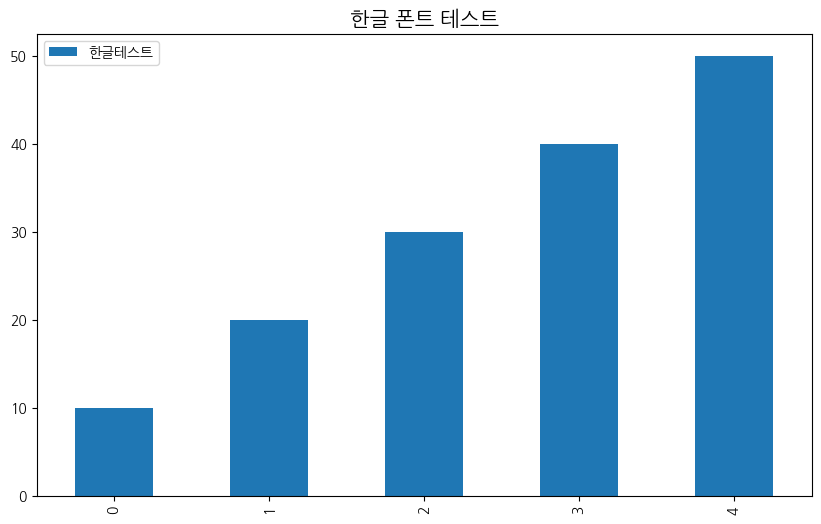

In [8]:
# NanumGothic
plt.rcParams['font.family'] = "NanumGothic"
data = {
    '한글테스트': [10, 20, 30, 40, 50]
}
pd.DataFrame(data).plot(kind='bar')
plt.title('한글 폰트 테스트', fontsize=15)
plt.show()

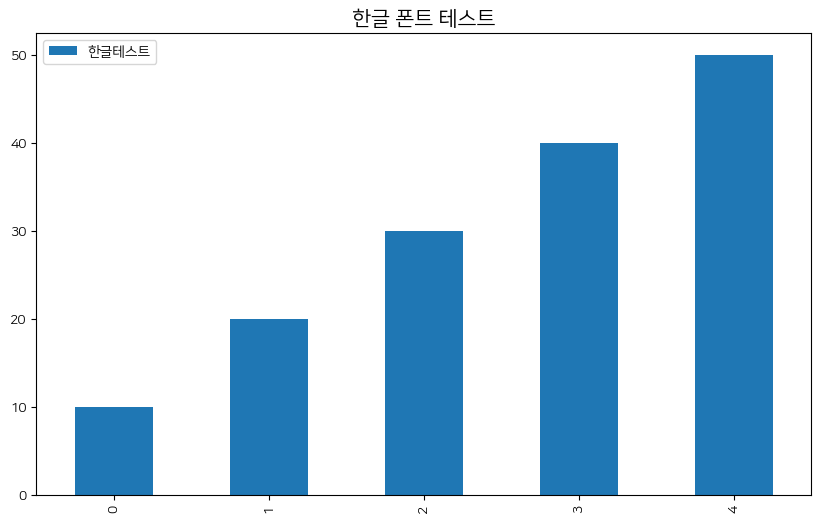

In [9]:
# NanumSquare
plt.rcParams['font.family'] = "NanumSquare"
data = {
    '한글테스트': [10, 20, 30, 40, 50]
}
pd.DataFrame(data).plot(kind='bar')
plt.title('한글 폰트 테스트', fontsize=15)
plt.show()

## XGBoost CPU & GPU 학습시간 비교

In [10]:
import time
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

def model_test(model_name, model):
    x, y = make_regression(n_samples=100000, n_features=100)
    
    start_time = time.time()
    model.fit(x, y)
    end_time = time.time()
    return f'{model_name}: 소요시간: {(end_time - start_time)} 초'

xgb = XGBRegressor(n_estimators=1000, 
                   learning_rate=0.01, 
                   subsample=0.8, 
                   colsample_bytree=0.8,
                   objective='reg:squarederror', 
                   n_jobs=-1,
                  )

print(model_test('xgb (cpu)', xgb))

xgb = XGBRegressor(n_estimators=1000, 
                   learning_rate=0.01, 
                   subsample=0.8, 
                   colsample_bytree=0.8,
                   objective='reg:squarederror', 
                   tree_method='gpu_hist')

print(model_test('xgb (gpu)', xgb))

xgb (cpu): 소요시간: 39.177695751190186 초
xgb (gpu): 소요시간: 3.4368841648101807 초


In [11]:
import time
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

def model_test(model_name, model):
    x, y = make_regression(n_samples=10000, n_features=100)
    
    start_time = time.time()
    model.fit(x, y)
    end_time = time.time()
    return f'{model_name}: 소요시간: {(end_time - start_time)} 초'

lgbm = LGBMRegressor(n_estimators=5000, 
                     learning_rate=0.01, 
                     subsample=0.8, 
                     colsample_bytree=0.8,
                     n_jobs=-1,
                    )

print(model_test('lgbm (cpu)', lgbm))

lgbm = LGBMRegressor(n_estimators=5000, 
                     learning_rate=0.01, 
                     subsample=0.8, 
                     colsample_bytree=0.8,
                     boosting_type='gbdt', 
                     device='gpu'
                    )

print(model_test('lgbm (gpu)', lgbm))

lgbm (cpu): 소요시간: 11.226160526275635 초
lgbm (gpu): 소요시간: 21.859968662261963 초


In [12]:
# wordcloud, prophet 정상 설치 여부 확인
import wordcloud
import prophet

In [13]:
import tensorflow_datasets as tfds
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
import warnings

warnings.filterwarnings('ignore')

dataset_name = 'horses_or_humans'

# 처음 80%의 데이터만 사용
train_dataset = tfds.load(name=dataset_name, split='train[:80%]')

# 최근 20%의 데이터만 사용
valid_dataset = tfds.load(name=dataset_name, split='train[80%:]')

def preprocess(data):
    # x, y 데이터를 정의합니다.
    x = data['image']
    y = data['label']
    # image 정규화(Normalization)
    x = x / 255
    # 사이즈를 (224, 224)로 변환합니다.
    x = tf.image.resize(x, size=(224, 224))
    # x, y  데이터를 return 합니다.
    return x, y

batch_size=32

train_data = train_dataset.map(preprocess).batch(batch_size)
valid_data = valid_dataset.map(preprocess).batch(batch_size)

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
transfer_model.trainable=False

model = Sequential([
    transfer_model,
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

model.fit(train_data,
          validation_data=(valid_data),
          epochs=20,
          callbacks=[checkpoint],
          )

2023-01-14 18:48:07.110235: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteWTS5YP/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteWTS5YP/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


2023-01-14 18:48:21.905183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 18:48:22.667796: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22198 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:21:00.0, compute capability: 8.6
2023-01-14 18:48:22.668837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22288 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:49:00.0, compute capability: 8.6


58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/20


2023-01-14 18:48:34.390359: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-01-14 18:48:37.197868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-14 18:48:37.334735: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f0724eeeb70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-01-14 18:48:37.334752: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-01-14 18:48:37.334756: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-01-14 18:48:37.338386: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-01-14 

26/26 [==============================] - ETA: 0s - loss: 0.8977 - acc: 0.8491
Epoch 1: val_loss improved from inf to 0.03146, saving model to my_checkpoint.ckpt
26/26 [==============================] - 19s 343ms/step - loss: 0.8977 - acc: 0.8491 - val_loss: 0.0315 - val_acc: 0.9805
Epoch 2/20
25/26 [===========================>..] - ETA: 0s - loss: 0.0182 - acc: 0.9937
Epoch 2: val_loss improved from 0.03146 to 0.01113, saving model to my_checkpoint.ckpt
26/26 [==============================] - 2s 91ms/step - loss: 0.0177 - acc: 0.9939 - val_loss: 0.0111 - val_acc: 0.9951
Epoch 3/20
25/26 [===========================>..] - ETA: 0s - loss: 0.0028 - acc: 1.0000
Epoch 3: val_loss did not improve from 0.01113
26/26 [==============================] - 1s 39ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0344 - val_acc: 0.9854
Epoch 4/20
25/26 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9987
Epoch 4: val_loss did not improve from 0.01113
26/26 [======================

Files already downloaded and verified
Files already downloaded and verified


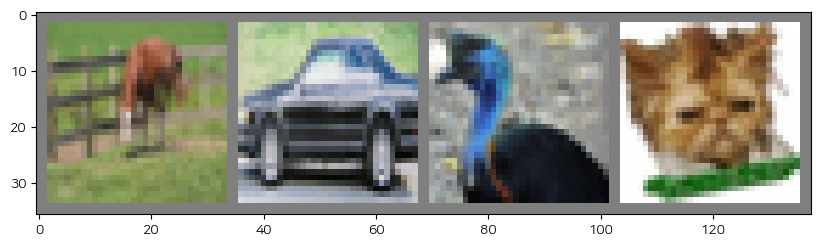

horse   car  bird   cat


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [16]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

[1,  2000] loss: 2.223
[1,  4000] loss: 1.873
[1,  6000] loss: 1.697
[1,  8000] loss: 1.593
[1, 10000] loss: 1.531
[1, 12000] loss: 1.479
[2,  2000] loss: 1.417
[2,  4000] loss: 1.401
[2,  6000] loss: 1.361
[2,  8000] loss: 1.359
[2, 10000] loss: 1.316
[2, 12000] loss: 1.298
Finished Training
